# CREDIT RISK PREDICTION
### by Sikho B. Mda - 202350250

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Importing Dataset

In [4]:
data = pd.read_csv('credit_risk_dataset.csv')
data

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

### Dataset Overview

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Data Preprocessing
Handling missing and duplicate values;
Encoding categorical features

In [7]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
#df = data.dropna()
df = data.fillna(data.median(numeric_only=True))

In [9]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [10]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

### Exploratory Data Analysis

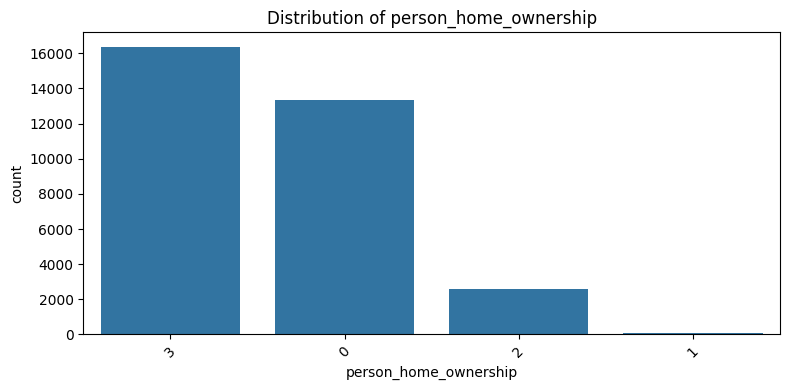

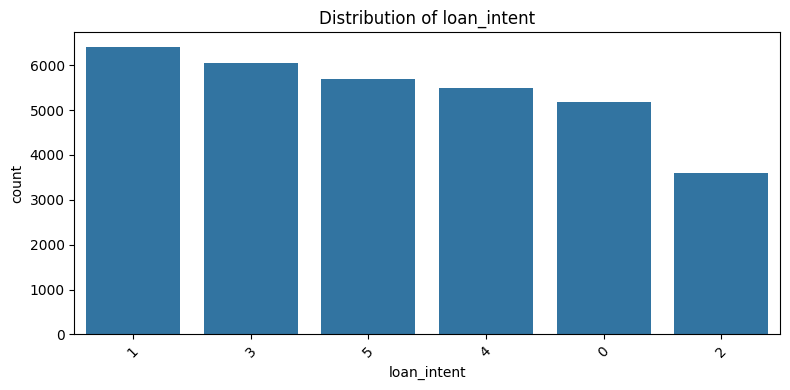

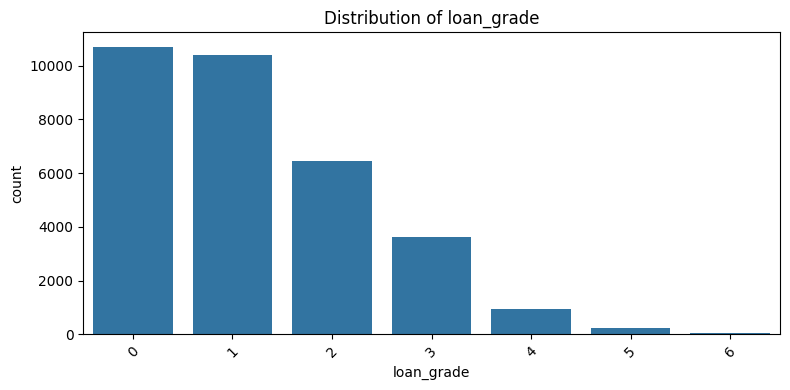

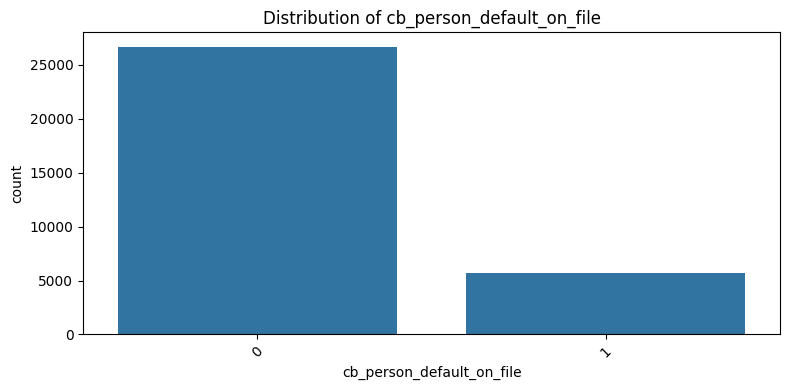

In [14]:
# Distribution of categorical features
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

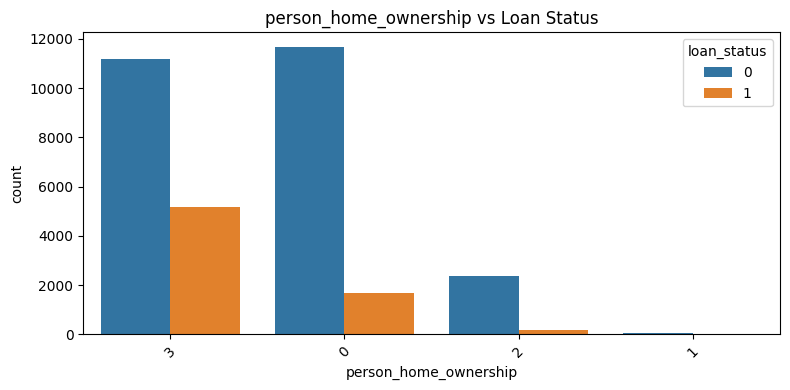

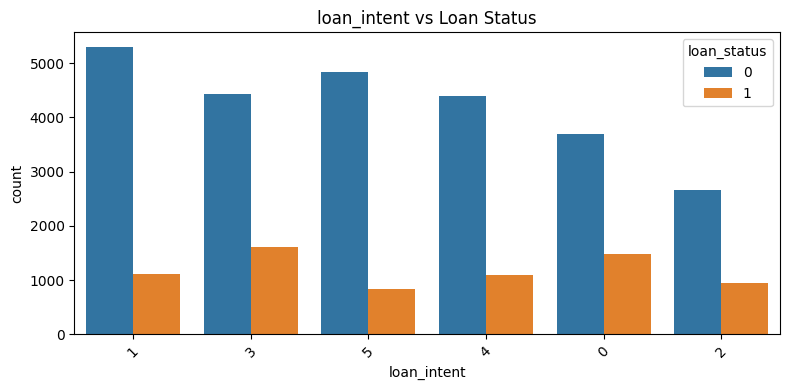

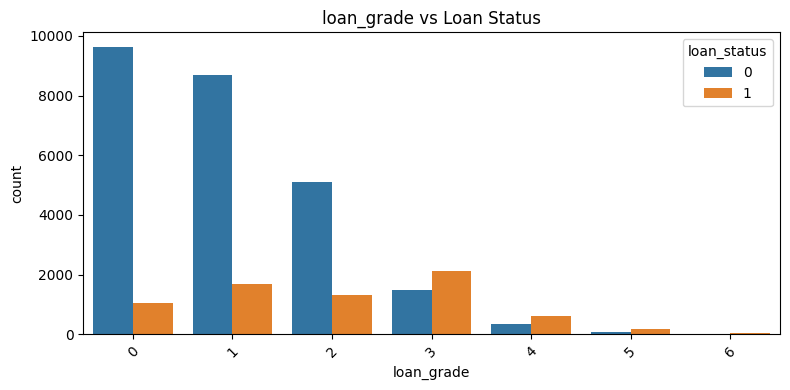

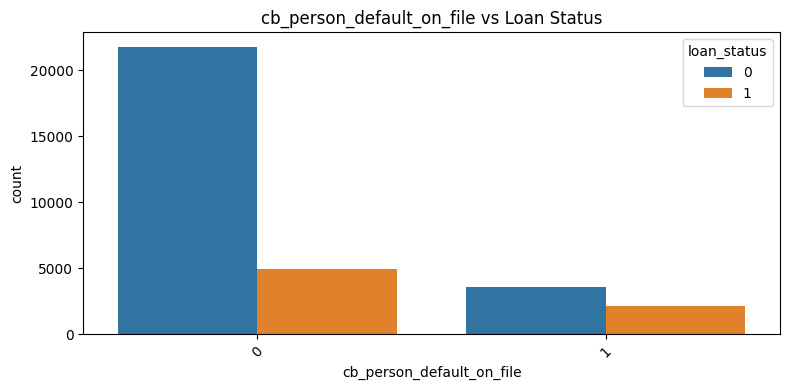

In [15]:
# Relationship between categorical features and loan status
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='loan_status', order=df[col].value_counts().index)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

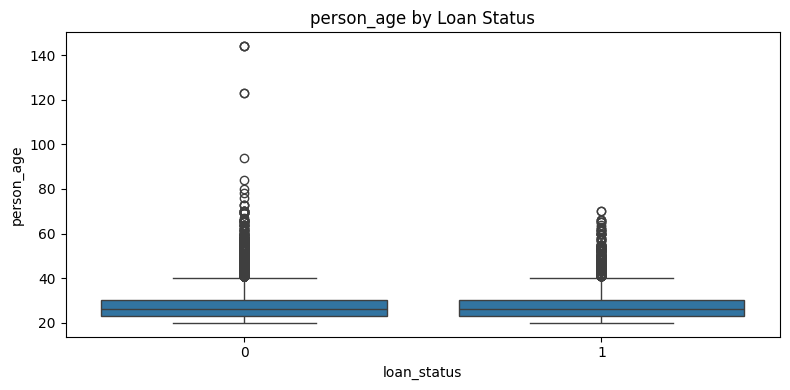

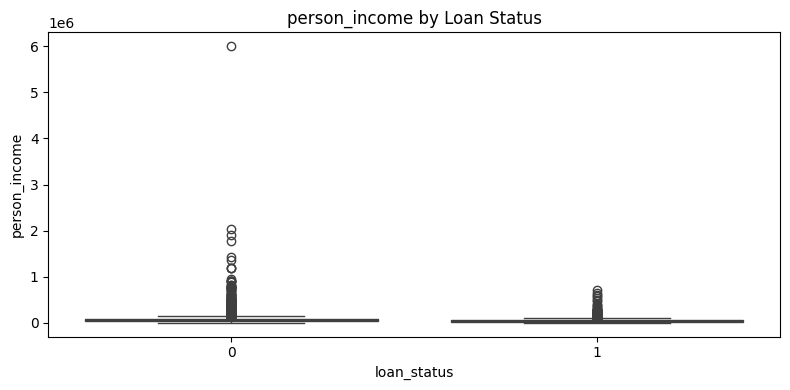

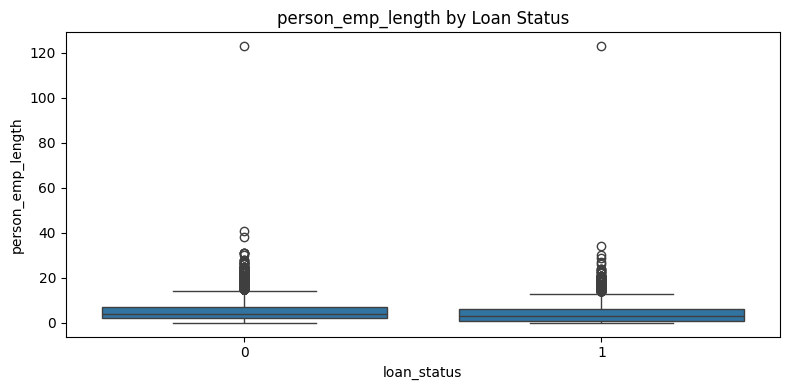

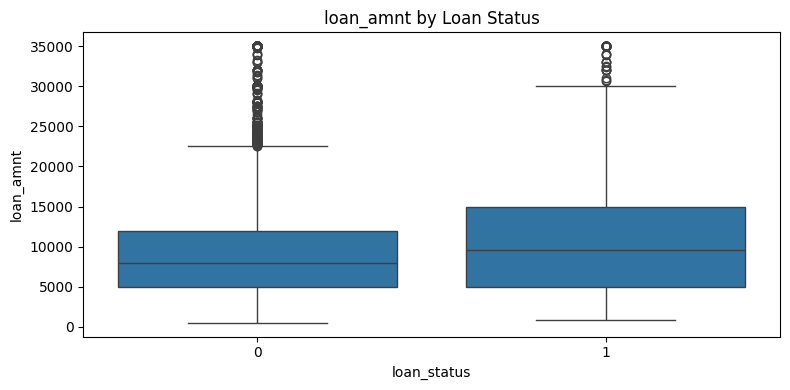

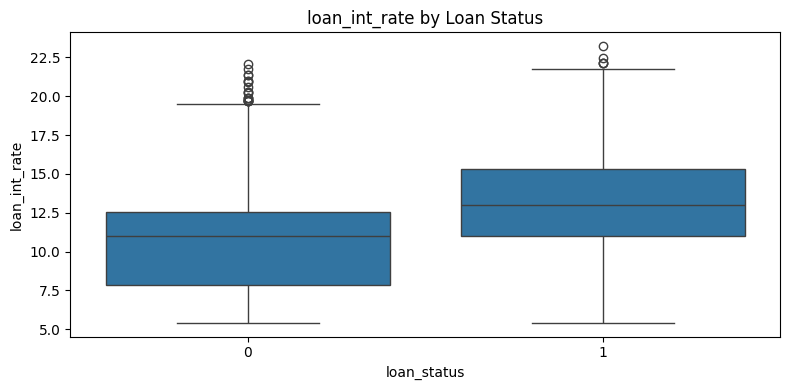

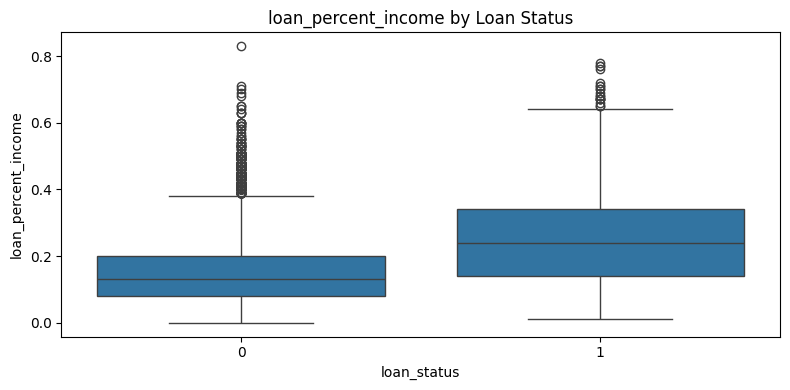

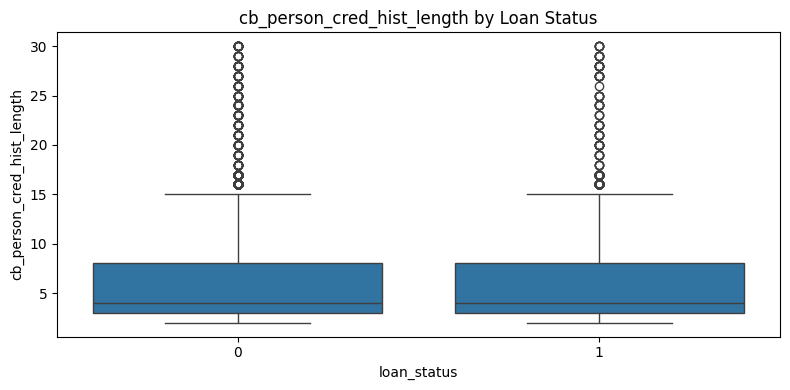

In [16]:
# Boxplots for numerical features by loan_status
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title(f"{col} by Loan Status")
    plt.tight_layout()
    plt.show()


Class Distribution:
loan_status
0    25327
1     7089
Name: count, dtype: int64


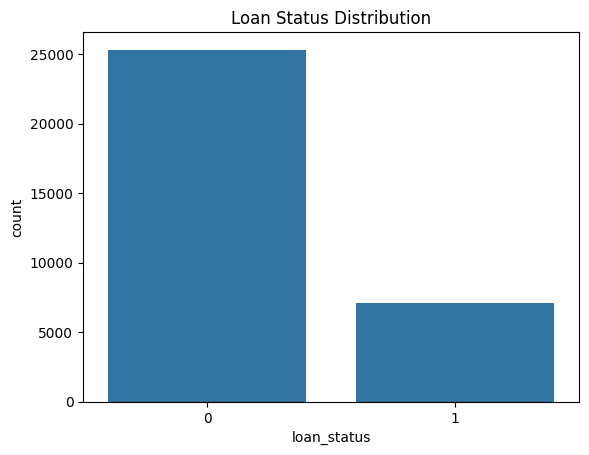

In [17]:
print("\nClass Distribution:")
print(df['loan_status'].value_counts())
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()

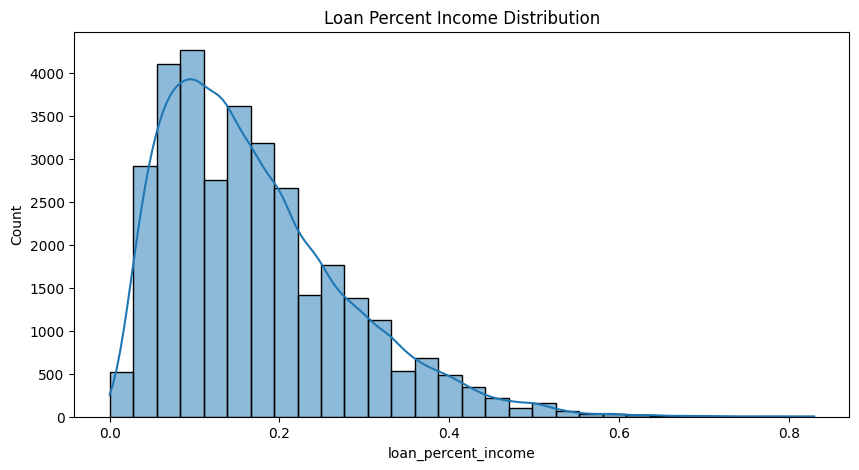

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['loan_percent_income'], bins=30, kde=True)
plt.title('Loan Percent Income Distribution')
plt.show()

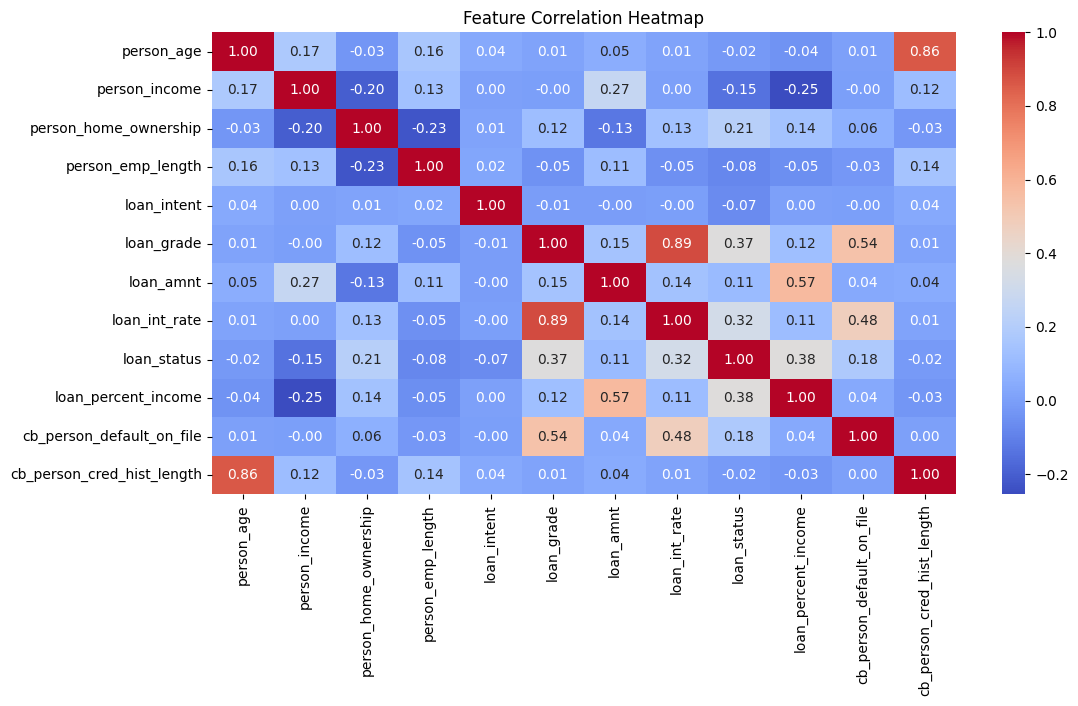

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

### Models
#### Decision Tree, Random Forest, XGBoost, & MLP Classifier

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
X_scaled = scaler.fit_transform(X)

In [21]:
import sys
print(sys.executable)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Decision Tree trained.
Random Forest trained.
XGBoost trained.


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
#MLP Classifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
mlp_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

mlp_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [29]:
mlp_preds = (mlp_model.predict(X_test) > 0.5).astype(int)
print("\nMLP Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, mlp_preds):.4f}")
print(f"Precision: {precision_score(y_test, mlp_preds):.4f}")
print(f"Recall: {recall_score(y_test, mlp_preds):.4f}")
print(f"F1 Score: {f1_score(y_test, mlp_preds):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, mlp_preds):.4f}")

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step

MLP Classifier Evaluation:
Accuracy: 0.9183
Precision: 0.9183
Recall: 0.6853
F1 Score: 0.7849
AUC-ROC: 0.8342


In [30]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")

In [31]:
for name, model in models.items():
    evaluate_model(name, model)


Decision Tree Evaluation:
Accuracy: 0.8859
Precision: 0.7265
Recall: 0.7626
F1 Score: 0.7441
AUC-ROC: 0.8414

Random Forest Evaluation:
Accuracy: 0.9291
Precision: 0.9630
Recall: 0.7009
F1 Score: 0.8113
AUC-ROC: 0.8467

XGBoost Evaluation:
Accuracy: 0.9369
Precision: 0.9613
Recall: 0.7399
F1 Score: 0.8362
AUC-ROC: 0.8658


In [32]:
# Explainable AI with SHAP
import shap
shap.initjs()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
# SHAP for the best performing model
best_model = models["XGBoost"]
explainer = shap.Explainer(best_model)
shap_values = explainer(X_train[:100])

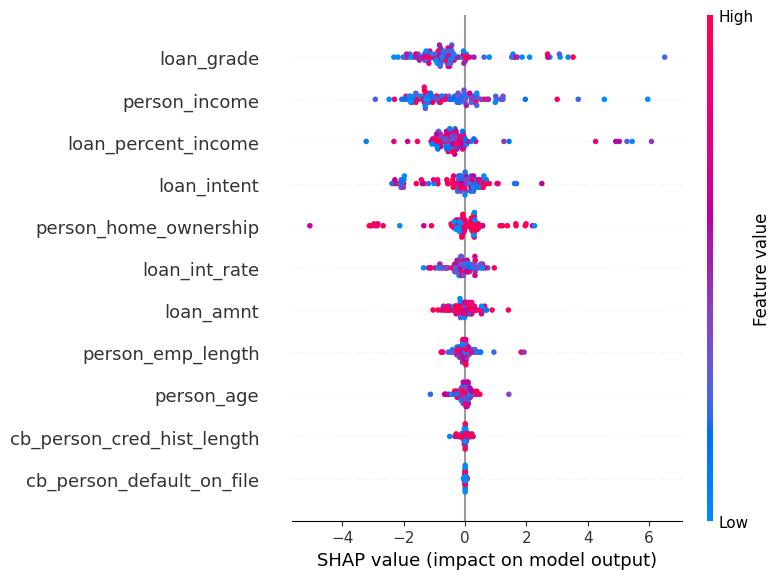

In [34]:
# Summary plot
shap.summary_plot(shap_values, X.iloc[:100])

This SHAP summary plot shows the impact of each feature on the XGBoost model’s credit-risk predictions:

* Top features influencing predictions include `person_income`, `loan_grade`, and `loan_percent_income`.
* Higher income (red) tends to reduce risk (negative SHAP values).
* Lower loan grades (blue) increase risk, indicating worse creditworthiness.
* `loan_percent_income` has strong influence — higher values (red) tend to increase predicted risk.
* Features like `cb_person_default_on_file` and `loan_int_rate` also play moderate roles.

Thus, income, loan quality, and affordability are key drivers in the model’s decisions.

In [35]:
# SHAP for MLP model
def mlp_predict_fn(data):
    return mlp_model.predict(data).flatten()

In [36]:
mlp_explainer = shap.KernelExplainer(mlp_predict_fn, X_train[:100])
mlp_shap_values = mlp_explainer.shap_values(X_train[:100], nsamples=100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step


  1%|          | 1/100 [00:00<00:44,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


  2%|▏         | 2/100 [00:00<00:41,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step


  3%|▎         | 3/100 [00:01<00:39,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


  4%|▍         | 4/100 [00:01<00:38,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


  5%|▌         | 5/100 [00:02<00:37,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step


  6%|▌         | 6/100 [00:02<00:36,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


  7%|▋         | 7/100 [00:02<00:35,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step


  8%|▊         | 8/100 [00:03<00:35,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


  9%|▉         | 9/100 [00:03<00:34,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


 10%|█         | 10/100 [00:03<00:34,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step


 11%|█         | 11/100 [00:04<00:34,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step


 12%|█▏        | 12/100 [00:04<00:33,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


 13%|█▎        | 13/100 [00:05<00:32,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


 14%|█▍        | 14/100 [00:05<00:32,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step


 15%|█▌        | 15/100 [00:05<00:31,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step


 16%|█▌        | 16/100 [00:06<00:30,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


 17%|█▋        | 17/100 [00:06<00:29,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


 18%|█▊        | 18/100 [00:06<00:29,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


 19%|█▉        | 19/100 [00:07<00:28,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


 20%|██        | 20/100 [00:07<00:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step


 21%|██        | 21/100 [00:07<00:27,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step


 22%|██▏       | 22/100 [00:08<00:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


 23%|██▎       | 23/100 [00:08<00:27,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


 24%|██▍       | 24/100 [00:08<00:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


 25%|██▌       | 25/100 [00:09<00:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step


 26%|██▌       | 26/100 [00:09<00:25,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


 27%|██▋       | 27/100 [00:09<00:25,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


 28%|██▊       | 28/100 [00:10<00:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


 29%|██▉       | 29/100 [00:10<00:25,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step


 30%|███       | 30/100 [00:11<00:25,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


 31%|███       | 31/100 [00:11<00:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


 32%|███▏      | 32/100 [00:11<00:24,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


 33%|███▎      | 33/100 [00:12<00:23,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step


 34%|███▍      | 34/100 [00:12<00:23,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


 35%|███▌      | 35/100 [00:12<00:23,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


 36%|███▌      | 36/100 [00:13<00:22,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


 37%|███▋      | 37/100 [00:13<00:22,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step


 38%|███▊      | 38/100 [00:13<00:22,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step


 39%|███▉      | 39/100 [00:14<00:21,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


 40%|████      | 40/100 [00:14<00:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


 41%|████      | 41/100 [00:14<00:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step


 42%|████▏     | 42/100 [00:15<00:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


 43%|████▎     | 43/100 [00:15<00:20,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step


 44%|████▍     | 44/100 [00:16<00:19,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step


 45%|████▌     | 45/100 [00:16<00:19,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


 46%|████▌     | 46/100 [00:16<00:18,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step


 47%|████▋     | 47/100 [00:17<00:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step


 48%|████▊     | 48/100 [00:17<00:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


 49%|████▉     | 49/100 [00:17<00:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


 50%|█████     | 50/100 [00:18<00:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


 51%|█████     | 51/100 [00:18<00:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


 52%|█████▏    | 52/100 [00:18<00:16,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


 53%|█████▎    | 53/100 [00:19<00:16,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


 54%|█████▍    | 54/100 [00:19<00:16,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step


 55%|█████▌    | 55/100 [00:19<00:16,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


 56%|█████▌    | 56/100 [00:20<00:16,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step


 57%|█████▋    | 57/100 [00:20<00:15,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step


 58%|█████▊    | 58/100 [00:20<00:14,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step


 59%|█████▉    | 59/100 [00:21<00:14,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


 60%|██████    | 60/100 [00:21<00:14,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step


 61%|██████    | 61/100 [00:22<00:13,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


 62%|██████▏   | 62/100 [00:22<00:13,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step


 63%|██████▎   | 63/100 [00:22<00:13,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


 64%|██████▍   | 64/100 [00:23<00:13,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


 65%|██████▌   | 65/100 [00:23<00:16,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 66%|██████▌   | 66/100 [00:24<00:21,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


 67%|██████▋   | 67/100 [00:25<00:20,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


 68%|██████▊   | 68/100 [00:26<00:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


 69%|██████▉   | 69/100 [00:26<00:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


 70%|███████   | 70/100 [00:27<00:16,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step


 71%|███████   | 71/100 [00:27<00:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


 72%|███████▏  | 72/100 [00:27<00:13,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step


 73%|███████▎  | 73/100 [00:28<00:12,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


 74%|███████▍  | 74/100 [00:28<00:10,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


 75%|███████▌  | 75/100 [00:28<00:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step


 76%|███████▌  | 76/100 [00:29<00:09,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


 77%|███████▋  | 77/100 [00:29<00:08,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


 78%|███████▊  | 78/100 [00:30<00:08,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


 79%|███████▉  | 79/100 [00:30<00:07,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


 80%|████████  | 80/100 [00:30<00:07,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step


 81%|████████  | 81/100 [00:31<00:06,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step


 82%|████████▏ | 82/100 [00:31<00:06,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


 83%|████████▎ | 83/100 [00:31<00:06,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


 84%|████████▍ | 84/100 [00:32<00:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


 85%|████████▌ | 85/100 [00:32<00:06,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step


 86%|████████▌ | 86/100 [00:33<00:05,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step


 87%|████████▋ | 87/100 [00:33<00:05,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step


 88%|████████▊ | 88/100 [00:34<00:05,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step


 89%|████████▉ | 89/100 [00:34<00:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step


 90%|█████████ | 90/100 [00:34<00:04,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


 91%|█████████ | 91/100 [00:35<00:03,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


 92%|█████████▏| 92/100 [00:35<00:03,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


 93%|█████████▎| 93/100 [00:36<00:02,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


 94%|█████████▍| 94/100 [00:36<00:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step


 95%|█████████▌| 95/100 [00:36<00:01,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


 96%|█████████▌| 96/100 [00:37<00:01,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


 97%|█████████▋| 97/100 [00:37<00:01,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


 98%|█████████▊| 98/100 [00:37<00:00,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


 99%|█████████▉| 99/100 [00:38<00:00,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


100%|██████████| 100/100 [00:38<00:00,  2.59it/s]


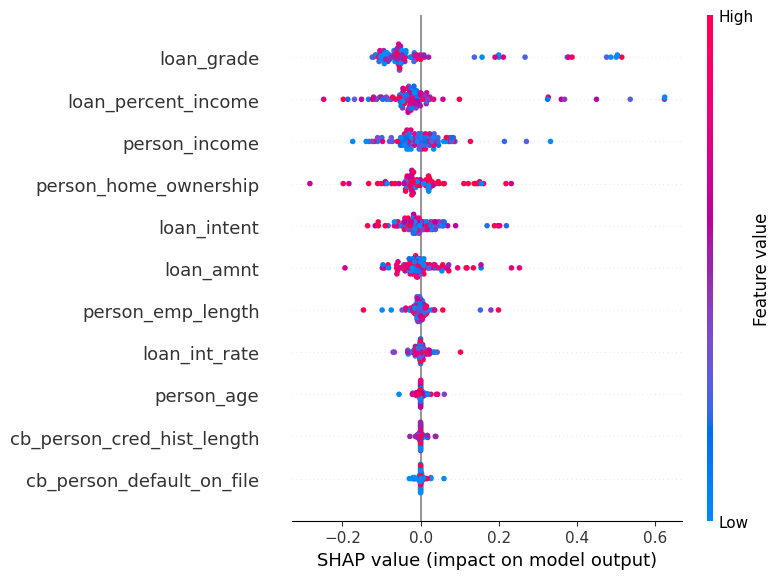

In [37]:
# Summary plot for MLP
shap.summary_plot(mlp_shap_values, X.iloc[:100], show=True)

In [38]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

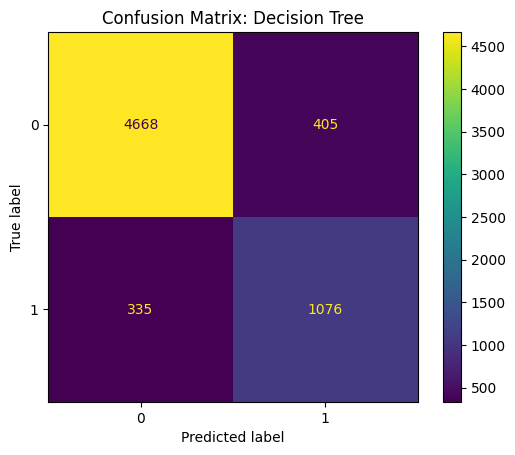

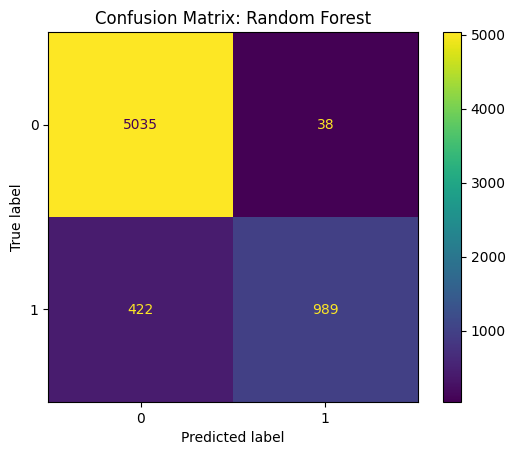

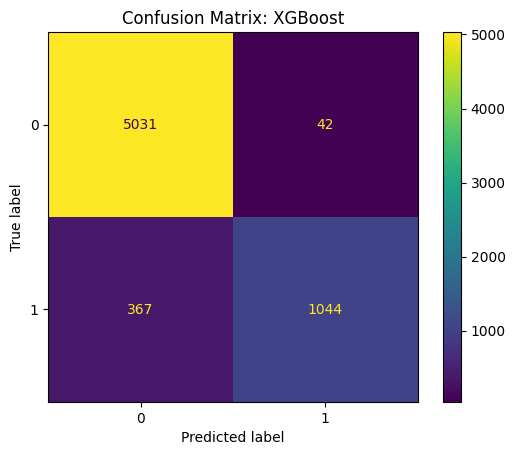

In [39]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

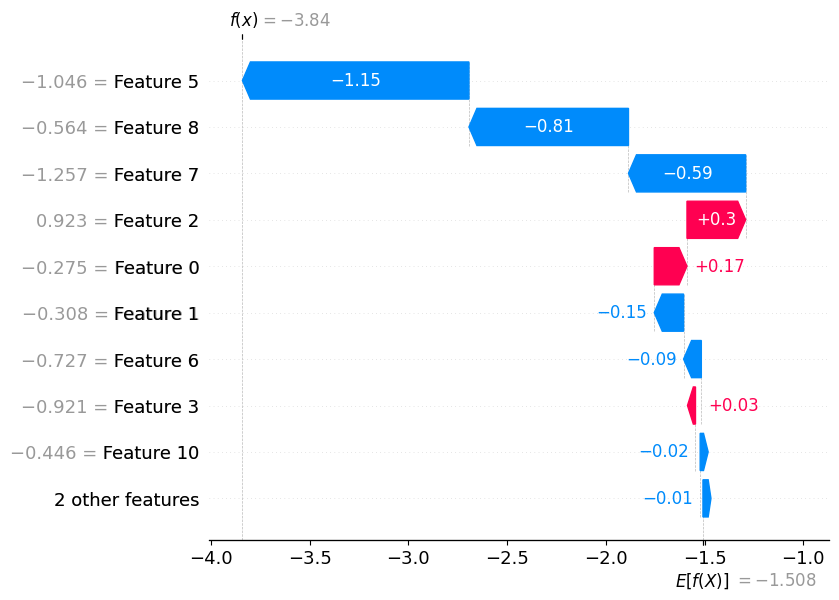

In [40]:
# SHAP decision plot (for a single prediction)
shap.plots.waterfall(shap_values[0])

Saving the preprocessing objects for use in the streamlit app:

In [41]:
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

# Save label encoders for each categorical variable
label_encoders = {}
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']